In [21]:
# Imports
import json
import pandas as pd
import numpy as np
import warnings
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import hvplot.pandas
warnings.filterwarnings("ignore")

# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns

# Import regressor algorithms
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

# Import model evaluations
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# For panel/dashboard
import panel as pn

In [22]:
#  Import and read the cash_data.csv.
import pandas as pd 
sales_df = pd.read_csv("LB_Sales_1.csv")
sales_df.head()

,Year,Date,Sales
0,2020.0,1/1/2020,1370.00
1,2020.0,1/1/2020,110.00
2,2020.0,1/1/2020,545.40
3,2020.0,1/1/2020,807.50
4,2020.0,1/1/2020,772.65


In [23]:
# Testing counts of each
sales_df.sum()

Year                                             4704538.0
Date     1/1/20201/1/20201/1/20201/1/20201/1/20201/1/20...
Sales                                          13061936.43
dtype: object

In [24]:
#Training and Testing
# Set the random seed
from numpy.random import seed
seed(1)
from tensorflow import random
random.set_seed(2)

In [25]:
x = sales_df[['Year']]
y = sales_df['Sales']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=100)

Text(0, 0.5, 'Sales')

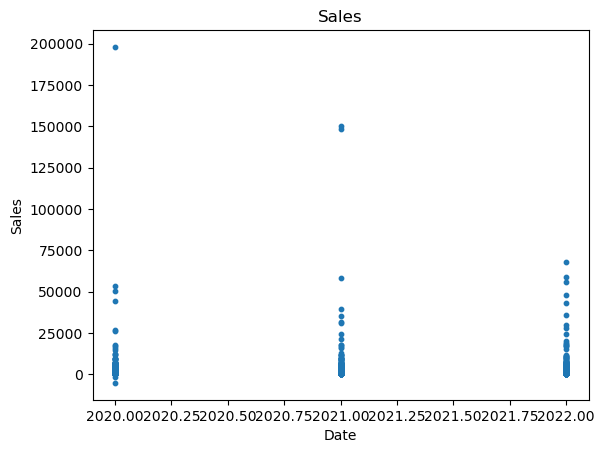

In [26]:
plt.scatter(x_train['Year'], y_train, s=10)
plt.title('Sales')
plt.xlabel ('Date')
plt.ylabel ('Sales')

In [27]:
# Run linear regression model
clf = LinearRegression()

In [28]:
clf.fit(x_train,y_train)
print(clf.intercept_)
print(clf.coef_)

-1943419.8250674123
[963.88018397]


In [29]:
y_pred = clf.predict(x_test)

In [30]:
clf.score(x_test,y_test)

-0.0004816498786115453

In [31]:
#Model Building, Comparison, and Evaluation
#We ran five machine learning algorithms to compare to the linear regression model to determine the best model to use.

In [32]:
#Extra Trees
# Define Model
et_model = ExtraTreesRegressor(n_estimators=1000, max_depth=4, random_state=25)

# Fit the Model
et_model.fit(x_train, y_train)

# Make predictions using the testing data
y_pred_et = et_model.predict(x_test)

In [33]:
#Ridge
# Define Model
r_model = Ridge(alpha=1.0, random_state=25)

# Fit the Model
r_model.fit(x_train, y_train)

# Make predictions using the testing data
y_pred_r = r_model.predict(x_test)

In [34]:
#Lasso
# Instantiate machine learning model
lasso = Lasso()

# Fit the machine learning model with the training data
lasso.fit(x_train, y_train)

# Make predictions using the testing data
y_pred_lasso = lasso.predict(x_test)

In [35]:
#Random Forest
# Instantiate machine learning model
rf = RandomForestRegressor()

# Fit the machine learning model with the training data
rf.fit(x_train, y_train)

# Make predictions using the testing data
y_pred_rf = rf.predict(x_test)

In [36]:
#SGD
# Instantiate machine learning model
sgd = SGDRegressor()

# Fit the machine learning model with the training data
sgd.fit(x_train, y_train)

# Make predictions using the testing data
y_pred_sgd = sgd.predict(x_test)

In [37]:
#Compare each model
# Get the coefficient of determination R2
# R2 Variables
r2_Linear_Regression = r2_score(y_test, y_pred)
r2_et = r2_score(y_test, y_pred_et)
r2_r = r2_score(y_test, y_pred_r)
r2_lasso = r2_score(y_test, y_pred_lasso)
r2_rf = r2_score(y_test, y_pred_rf)
r2_sgd = r2_score(y_test, y_pred_sgd)

# Create Dataframe for R2 Scores
r2 = [['Linear Regression', r2_Linear_Regression], ['Extra Trees', r2_et], ['Ridge', r2_r], ["Lasso", r2_lasso], ['Random Forest', r2_rf], ['SGD', r2_sgd]]
df_r2 = pd.DataFrame(r2, columns=['Model', 'r2 Score'])
df_r2.head(6)

,Model,r2 Score
0,Linear Regression,-4.816499e-04
1,Extra Trees,1.156821e-04
2,Ridge,-4.821835e-04
3,Lasso,-4.820370e-04
4,Random Forest,4.249342e-06
5,SGD,-3.913135e+21


In [38]:
# Plot the values
#plt.plot(r2)
df_r2.hvplot.bar(
    x="Model", y="r2 Score", xlabel="Model", ylabel="r2 Score", rot=90
)

:Bars   [Model]   (r2 Score)

In [39]:
# Get the Mean Squared Error
# MSE Variables
mse_Linear_Regression = mean_squared_error(y_test, y_pred)
mse_et = mean_squared_error(y_test, y_pred_et)
mse_r = mean_squared_error(y_test, y_pred_r)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_sgd = mean_squared_error(y_test, y_pred_sgd)

# Create Dataframe for R2 Scores
mse = [['Linear Regression', mse_Linear_Regression], ['Extra Trees', mse_et], ['Ridge', mse_r], ["Lasso", mse_lasso], ['Random Forest', mse_rf], ['SGD', mse_sgd]]
df_mse = pd.DataFrame(mse, columns=['Model', 'Mean Squared Error'])
df_mse.head(6)

,Model,Mean Squared Error
0,Linear Regression,2.954869e+09
1,Extra Trees,2.953105e+09
2,Ridge,2.954870e+09
3,Lasso,2.954870e+09
4,Random Forest,2.953434e+09
5,SGD,1.155723e+31


In [40]:
# Plot the values
#plt.plot(r2)
df_mse.hvplot.bar(
    x="Model", y="Mean Squared Error", xlabel="Model", ylabel="Mean Squared Error", rot=90
)

:Bars   [Model]   (Mean Squared Error)

In [41]:
# Get the Root Mean Squared Error
# RMSE Variables
rmse_Linear_Regression = np.sqrt(mean_squared_error(y_test, y_pred))
rmse_et = np.sqrt(mean_squared_error(y_test, y_pred_et))
rmse_r = np.sqrt(mean_squared_error(y_test, y_pred_r))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
rmse_sgd = np.sqrt(mean_squared_error(y_test, y_pred_sgd))

# Create Dataframe for R2 Scores
rmse = [['Linear Regression', rmse_Linear_Regression], ['Extra Trees', rmse_et], ['Ridge', rmse_r], ["Lasso", rmse_lasso], ['Random Forest', rmse_rf], ['SGD', rmse_sgd]]
df_rmse = pd.DataFrame(mse, columns=['Model', 'Root Mean Squared Error'])
df_rmse.head(6)

,Model,Root Mean Squared Error
0,Linear Regression,2.954869e+09
1,Extra Trees,2.953105e+09
2,Ridge,2.954870e+09
3,Lasso,2.954870e+09
4,Random Forest,2.953434e+09
5,SGD,1.155723e+31


In [42]:
# Plot the values
#plt.plot(r2)
df_rmse.hvplot.bar(
    x="Model", y="Root Mean Squared Error", xlabel="Model", ylabel="Root Mean Squared Error", rot=90
)

:Bars   [Model]   (Root Mean Squared Error)

In [43]:
#R2 - SGD is closest to 1
#Mean Squared Error - SGD is the lowest
#Root Mean Squared Error - SGD is the lowest

#Overall, the Linear Regression model was the most favorable according to a comparison of results.

In [44]:
#Model Performance
#We evaluated the performance of the most accurate model chosen above (Linear Regression).

# Predict outcomes for test data set
predictions = sgd.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1987,3.401537e+15,2573.32
1849,3.401537e+15,947.10
483,3.398173e+15,1995.00
1729,3.401537e+15,583.92
232,3.398173e+15,245.00
...,...,...
672,3.398173e+15,801.14
2056,3.401537e+15,1815.00
727,3.398173e+15,1350.38
1645,3.399855e+15,390.00


In [47]:
# Create a DataFrame of Real and Predicted values
sales = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": predictions.ravel()
}, index = sales_df.index[-len(y_test): ]) 

# Show the DataFrame's head
sales.head()

,Actual,Predicted
698,2573.32,3.401537e+15
699,947.10,3.401537e+15
700,1995.00,3.398173e+15
701,583.92,3.401537e+15
702,245.00,3.398173e+15


<AxesSubplot:title={'center':'Actual Vs. Predicted sales'}>

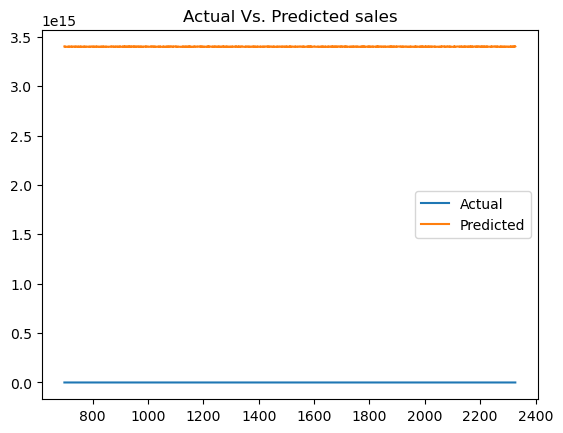

In [48]:
# Plot the real vs predicted values as a line chart
sales.plot(title="Actual Vs. Predicted sales")

In [49]:
# Predict outcomes for test data set
predictions = et_model.predict(x_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
1987,5269.719140,2573.32
1849,5269.719140,947.10
483,3435.980142,1995.00
1729,5269.719140,583.92
232,3435.980142,245.00
...,...,...
672,3435.980142,801.14
2056,5269.719140,1815.00
727,3435.980142,1350.38
1645,5028.730435,390.00


In [50]:
# Create a DataFrame of Real and Predicted values
sales = pd.DataFrame({
    "Actual": y_test.ravel(),
    "Predicted": predictions.ravel()
}, index = sales_df.index[-len(y_test): ]) 

# Show the DataFrame's head
sales.head()

,Actual,Predicted
698,2573.32,5269.719140
699,947.10,5269.719140
700,1995.00,3435.980142
701,583.92,5269.719140
702,245.00,3435.980142


<AxesSubplot:title={'center':'Actual Vs. Predicted sales'}>

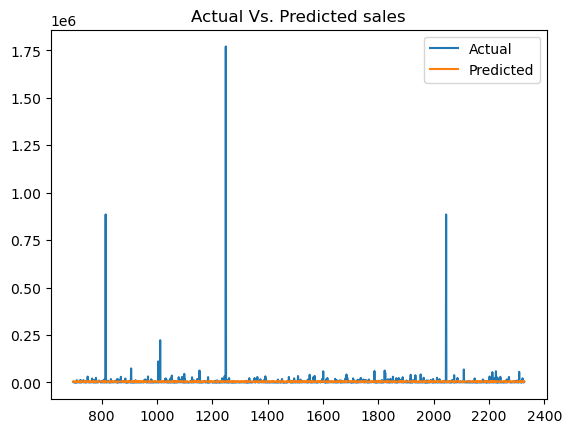

In [51]:
# Plot the real vs predicted values as a line chart
sales.plot(title="Actual Vs. Predicted sales")